<a href="https://colab.research.google.com/github/happy-jihye/GAN-Papers/blob/main/gan/StyleGAN2_ADA_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## StyleGAN2-ADA-Pytorch

- Reference : [https://github.com/NVlabs/stylegan2-ada-pytorch](https://github.com/NVlabs/stylegan2-ada-pytorch)

- Pull the StyleGan2-ADA-Pytorch from Github
- Change Runtime Type : GPU

In [1]:
from google.colab import files
import os
import shutil

!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd "/content/stylegan2-ada-pytorch"

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 125, done.
remote: Total 125 (delta 0), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% (125/125), 1.12 MiB | 23.93 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/stylegan2-ada-pytorch


In [ ]:
# @title Upload your own Image
#@markdown You can also upload images of several other datasets. (ex. [FFHQ-dataset](https://github.com/NVlabs/ffhq-dataset) )

files.upload()

In [ ]:
# @title Install Library
#@markdown - torch==1.7.1 
#@markdown - click, requests, tqdm, pyspng, ninja, imageio-ffmpeg==0.4.3

!pip install torch==1.7.1 click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

In [4]:
# @title Check the GPU

!nvidia-smi

Tue May  4 09:09:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!ls

00054.png	 Dockerfile	legacy.py     README.md        train.py
calc_metrics.py  docker_run.sh	LICENSE.txt   style_mixing.py
dataset_tool.py  docs		metrics       torch_utils
dnnlib		 generate.py	projector.py  training


In [6]:
!mkdir Output

In [7]:
file = "00054.png" #@param {type:"string"}
print("/content/{0}".format(file))

/content/00054.png


## Projecting images to latent space

In [13]:
#@title Choose Model and Run.
Model = "ffhq" #@param ["ffhq", "afhqdog", "afhqcat", "afhqwild", "metfaces"]
file = "00054.png" #@param {type:"string"}

!python projector.py --outdir="/content/stylegan2-ada-pytorch/Output" \
                     --target="/content/stylegan2-ada-pytorch/{file}" \
                    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/{Model}.pkl

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.69 loss 24567.36
step    2/1000: dist 0.75 loss 27640.72
step    3/1000: dist 0.74 loss 27166.86
step    4/1000: dist 0.67 loss 26253.47
step    5/1000: dist 0.69 loss 24957.30
step    6/1000: dist 0.70 loss 23352.24
step    7/1000: dist 0.68 loss 21510.84
step    8/1000: dist 0.64 loss 19486.92
step    9/1000: dist 0.62 loss 17341.55
step   10/1000: dist 0.67 loss 15140.45
step   11/1000: dist 0.61 loss 12947.12
step   12/1000: dist 0.57 loss 10818.14
step   13/1000: dist 0.64 loss 8801.35
step   14/1000: dist 0.60 loss 6946.64
step   15/1000: dist 0.56 loss 5313.87
step   16/1000: dist 0.59 loss 3971.68
step   17/1000: dist 0.54 loss 2942.55
step   18/1000: dist 0.53 loss 2210.96
step   19/1000: dist 0.55 loss

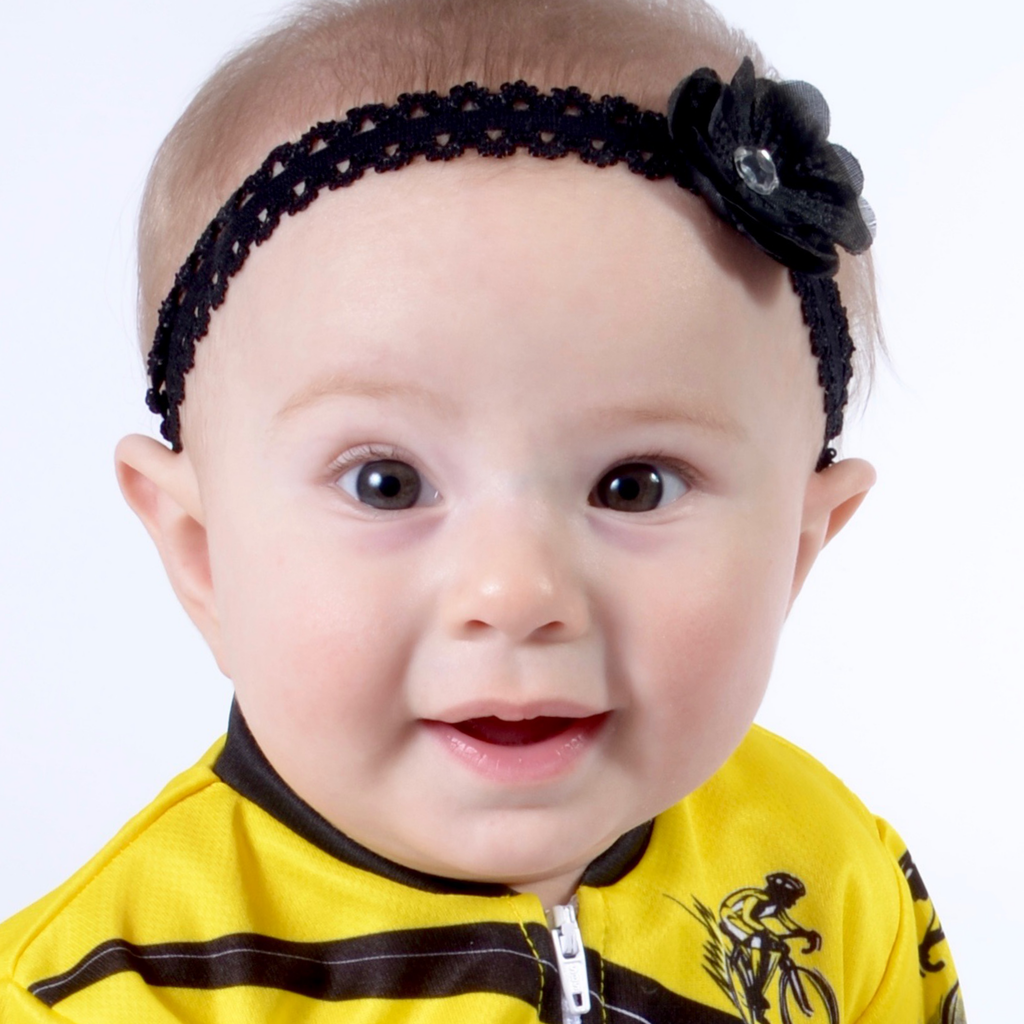

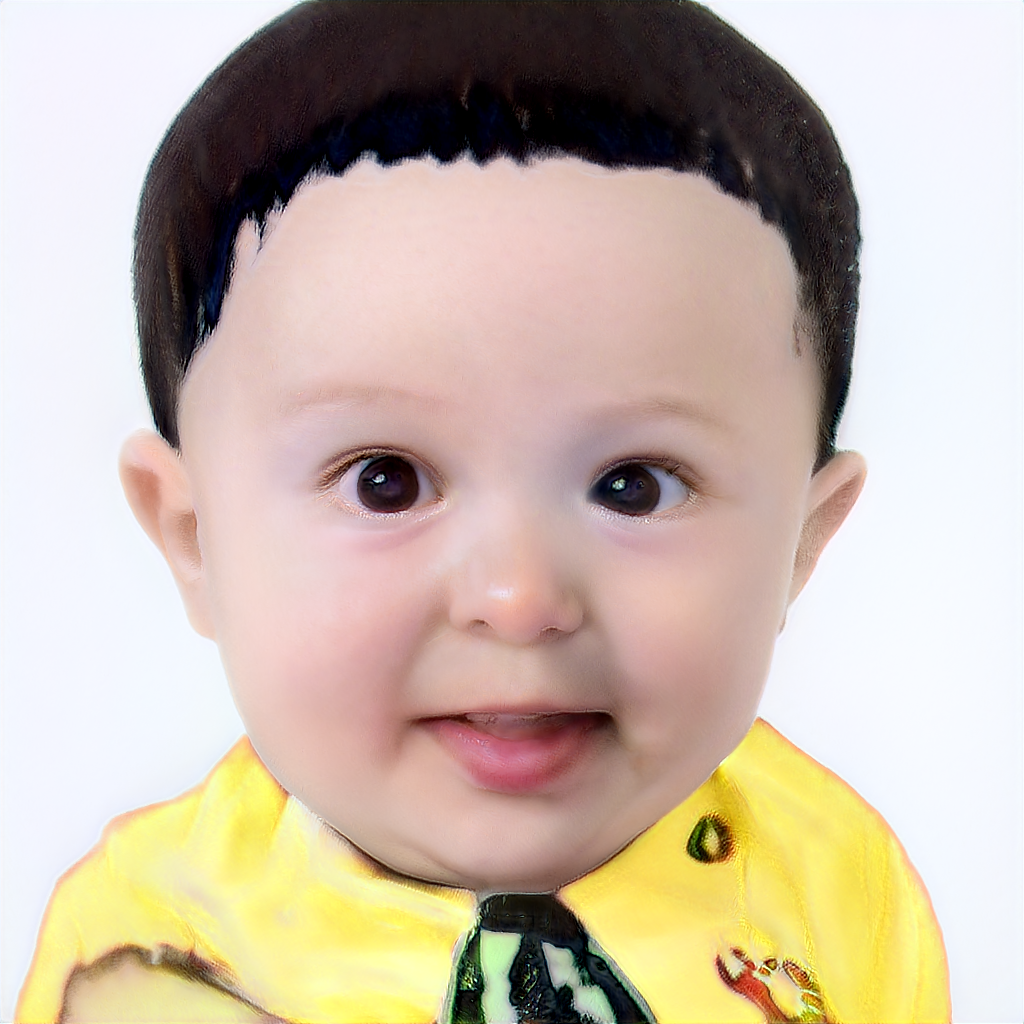

In [60]:
#@title Target Image & Project Image.

from IPython.display import display, Image

display(Image(filename='Output/target.png', width = 300), Image(filename='Output/proj.png', width = 300))

## Generate Image

In [68]:
output_folder = "Output2" #@param {type:"string"}
Model = "ffhq" #@param ["ffhq", "afhqdog", "afhqcat", "afhqwild", "metfaces"]

!mkdir output_folder

!python generate.py --outdir="/content/stylegan2-ada-pytorch/{output_folder}" --projected-w="/content/stylegan2-ada-pytorch/Output/projected_w.npz" \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/{Model}.pkl

mkdir: cannot create directory ‘output_folder’: File exists
Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"...
Generating images from projected W "/content/stylegan2-ada-pytorch/Output/projected_w.npz"
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


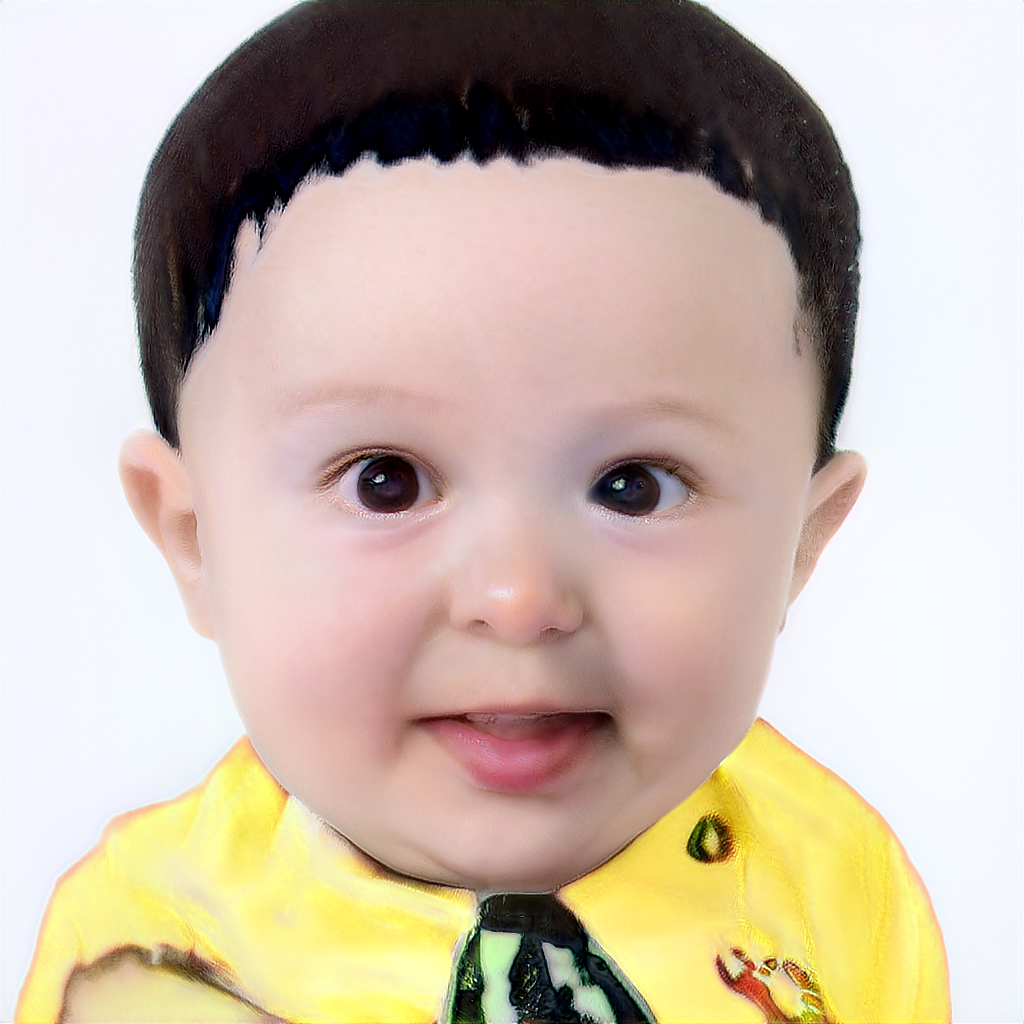

In [69]:
#@title Generating Image

display(Image(filename='Output2/proj00.png', width = 500))

## Generate Random Image

In [65]:
output_folder = "Output3" #@param {type:"string"}
Model = "afhqdog" #@param ["ffhq", "afhqdog", "afhqcat", "afhqwild", "metfaces"]

!mkdir output_folder

!python generate.py --outdir="/content/stylegan2-ada-pytorch/{output_folder}" \
                    --trunc=1 \
                    --seeds=85,265,297,849 \
                    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/{Model}.pkl


mkdir: cannot create directory ‘output_folder’: File exists
Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqdog.pkl"...
Generating image for seed 85 (0/4) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/4) ...
Generating image for seed 297 (2/4) ...
Generating image for seed 849 (3/4) ...


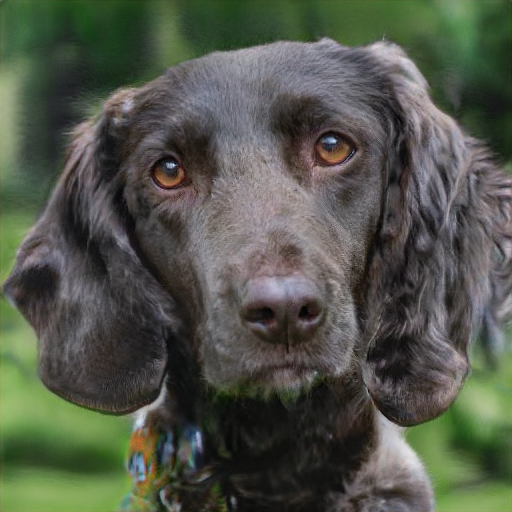

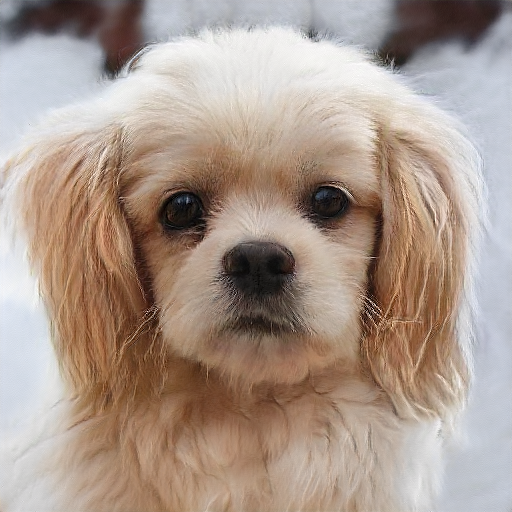

In [71]:
#@title Generating Random Image

display(Image(filename='Output3/seed0085.png', width = 300), Image(filename='Output3/seed0265.png', width = 300))